In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, DateFormatter
import seaborn as sns
import nltk
import missingno as msno
import yfinance as yf
from mergeStock import merge ### module for reading and merging data

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/shelly/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/shelly/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
df = merge('AAPL')

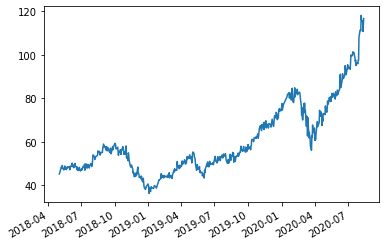

In [4]:
df.close.plot()

In [ ]:
# feature engineering

In [ ]:
df.columns.tolist()

In [32]:
def dataProcessing(df, scaler_choice='MinMax', split=0.9):
    # define input variable
    X = ['popularity_daily_avg', 'popularity_daily_change', 
         'close','volume', 'returnPrev1', 'returnPrev5',
         'VIX Close','vix_returnPrev1', 
         'vader_mean', 'vader_std', 'comment_count', 'pos_count'] #, 'neg_count', 'pos_mean', 'neg_mean']
    
    # define target variable
    Y = ['Y']
    df[Y] = df[Y].astype(int)
    
    # train test split 
    train = df[:int(len(df)*split)]
    test = df[int(len(df)*split):]
    
    # MinMax Scaler
    from sklearn.preprocessing import MinMaxScaler, StandardScaler
    
    if scaler_choice == 'MinMax':
        scaler = MinMaxScaler()
        train[X] = scaler.fit_transform(train[X])
        test[X] = scaler.transform(test[X])
    if scaler_choice =='Standard':
        scaler = StandardScaler()
        train[X] = scaler.fit_transform(train[X])
        test[X] = scaler.transform(test[X])
        
    if scaler_choice == 'Smooth':
        scaler = MinMaxScaler()
            # Train the Scaler with training data & smooth data
        smoothing_window_size = 90
        for di in range(0,len(train),smoothing_window_size):
            try:
                scaler.fit(train[X][di:di+smoothing_window_size])
                train.loc[train.index[di]:train.index[di+smoothing_window_size],X] = scaler.transform(train.loc[train.index[di]:train.index[di+smoothing_window_size],X])
            except:
                break
        # normalize the last bit
        print(di)
        scaler.fit(train[X][di:])
    #         train[X][di+smoothing_window_size:] = scaler.transform(train[X][di+smoothing_window_size:])
        train.loc[train.index[di]:,X] = scaler.transform(train.loc[train.index[di]:,X])
        test[X] = scaler.transform(test[X])
        print('finished!')
        

    return train[X], train[Y], test[X], test[Y]
#     return train[X].values, train_Y, test[X].values, test[Y].values



In [40]:
train_X, train_Y, test_X, test_Y = dataProcessing(df, scaler_choice='Smooth')

450
finished!


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [41]:
train_X

,popularity_daily_avg,popularity_daily_change,close,volume,returnPrev1,returnPrev5,VIX Close,vix_returnPrev1,vader_mean,vader_std,comment_count,pos_count
2018-05-02,0.294629,0.240269,0.000000,0.000000,0.296429,0.565038,0.725212,0.429310,0.657461,0.566226,0.023256,0.031250
2018-05-03,0.293069,0.181686,0.004026,0.009713,0.405192,0.264067,0.715297,0.339624,0.622251,0.872503,0.017442,0.031250
2018-05-04,0.268088,0.000000,0.028183,0.061604,0.586628,0.421445,0.555241,0.161517,0.597858,0.565843,0.023256,0.031250
2018-05-07,0.241286,0.061644,0.053347,0.083954,0.586331,0.520079,0.552408,0.347428,0.398644,0.863588,0.017442,0.015625
2018-05-08,0.209205,0.122530,0.043281,0.015908,0.285087,0.466500,0.546742,0.343933,0.922487,0.457251,0.023256,0.062500
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-18,0.965908,0.415592,0.903409,0.406060,0.571625,0.402913,0.031386,0.290986,0.370517,0.510646,0.272727,0.066667
2020-05-19,0.949230,0.395008,0.894112,0.497511,0.535751,0.543940,0.053701,0.492691,1.000000,0.000000,0.045455,0.066667
2020-05-20,0.938230,0.491652,0.926136,0.412628,0.581159,0.627250,0.007620,0.287528,0.531548,0.242560,0.136364,0.066667
2020-05-21,0.956472,0.589321,0.834711,0.389728,0.446494,0.492609,0.035559,0.512628,0.971813,0.067193,0.090909,0.133333


In [47]:
# Binary Classification: Baseline
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from keras.optimizers import SGD

# create model
model = Sequential()
model.add(Dense(24, input_dim=train_X.shape[1], activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(12, activation='relu'))
#model.add(Dense(12, activation ='relu'))
#model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
# Compile model
#opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
history = model.fit(train_X, train_Y, epochs=500, batch_size=50 )

Epoch 1/500
507/507 [==============================] - 1s 1ms/step - loss: 0.6882 - accuracy: 0.5424
Epoch 2/500
507/507 [==============================] - 0s 58us/step - loss: 0.6870 - accuracy: 0.5306
Epoch 3/500
507/507 [==============================] - 0s 54us/step - loss: 0.6867 - accuracy: 0.5464
Epoch 4/500
507/507 [==============================] - 0s 39us/step - loss: 0.6864 - accuracy: 0.5562
Epoch 5/500
507/507 [==============================] - 0s 43us/step - loss: 0.6861 - accuracy: 0.5621
Epoch 6/500
507/507 [==============================] - 0s 37us/step - loss: 0.6858 - accuracy: 0.5602
Epoch 7/500
507/507 [==============================] - 0s 32us/step - loss: 0.6852 - accuracy: 0.5266
Epoch 8/500
507/507 [==============================] - 0s 35us/step - loss: 0.6845 - accuracy: 0.5306
Epoch 9/500
507/507 [==============================] - 0s 34us/step - loss: 0.6842 - accuracy: 0.5641
Epoch 10/500
507/507 [==============================] - 0s 41us/step - loss: 0.6836

507/507 [==============================] - 0s 32us/step - loss: 0.6129 - accuracy: 0.6726
Epoch 160/500
507/507 [==============================] - 0s 37us/step - loss: 0.6095 - accuracy: 0.6647
Epoch 161/500
507/507 [==============================] - 0s 43us/step - loss: 0.6083 - accuracy: 0.6884
Epoch 162/500
507/507 [==============================] - 0s 41us/step - loss: 0.6069 - accuracy: 0.6765
Epoch 163/500
507/507 [==============================] - 0s 40us/step - loss: 0.6079 - accuracy: 0.6667
Epoch 164/500
507/507 [==============================] - 0s 34us/step - loss: 0.6074 - accuracy: 0.6726
Epoch 165/500
507/507 [==============================] - 0s 32us/step - loss: 0.6054 - accuracy: 0.7022
Epoch 166/500
507/507 [==============================] - 0s 34us/step - loss: 0.6066 - accuracy: 0.6805
Epoch 167/500
507/507 [==============================] - 0s 32us/step - loss: 0.6086 - accuracy: 0.6963
Epoch 168/500
507/507 [==============================] - 0s 32us/step - loss: 

507/507 [==============================] - 0s 39us/step - loss: 0.5429 - accuracy: 0.7298
Epoch 316/500
507/507 [==============================] - 0s 38us/step - loss: 0.5388 - accuracy: 0.7495
Epoch 317/500
507/507 [==============================] - 0s 39us/step - loss: 0.5399 - accuracy: 0.7436
Epoch 318/500
507/507 [==============================] - 0s 33us/step - loss: 0.5374 - accuracy: 0.7475
Epoch 319/500
507/507 [==============================] - 0s 31us/step - loss: 0.5379 - accuracy: 0.7337
Epoch 320/500
507/507 [==============================] - 0s 33us/step - loss: 0.5383 - accuracy: 0.7475
Epoch 321/500
507/507 [==============================] - 0s 34us/step - loss: 0.5376 - accuracy: 0.7535
Epoch 322/500
507/507 [==============================] - 0s 36us/step - loss: 0.5413 - accuracy: 0.7396
Epoch 323/500
507/507 [==============================] - 0s 36us/step - loss: 0.5373 - accuracy: 0.7475
Epoch 324/500
507/507 [==============================] - 0s 43us/step - loss: 

507/507 [==============================] - 0s 41us/step - loss: 0.4972 - accuracy: 0.7535
Epoch 472/500
507/507 [==============================] - 0s 34us/step - loss: 0.4980 - accuracy: 0.7495
Epoch 473/500
507/507 [==============================] - 0s 36us/step - loss: 0.4970 - accuracy: 0.7613
Epoch 474/500
507/507 [==============================] - 0s 35us/step - loss: 0.4969 - accuracy: 0.7574
Epoch 475/500
507/507 [==============================] - 0s 36us/step - loss: 0.4942 - accuracy: 0.7673
Epoch 476/500
507/507 [==============================] - 0s 31us/step - loss: 0.4946 - accuracy: 0.7673
Epoch 477/500
507/507 [==============================] - 0s 35us/step - loss: 0.4940 - accuracy: 0.7633
Epoch 478/500
507/507 [==============================] - 0s 33us/step - loss: 0.4974 - accuracy: 0.7554
Epoch 479/500
507/507 [==============================] - 0s 32us/step - loss: 0.4932 - accuracy: 0.7653
Epoch 480/500
507/507 [==============================] - 0s 34us/step - loss: 

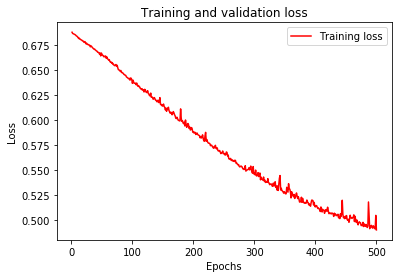

In [49]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
#val_acc = history.history['val_acc']
loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r-', label='Training loss')
# b is for "solid blue line"
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

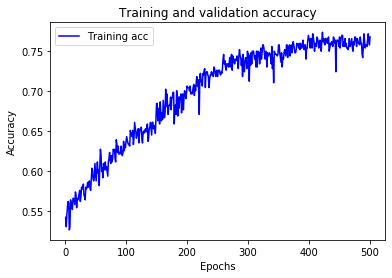

In [50]:
plt.clf()   # clear figure
acc_values = history.history['accuracy']
#val_acc_values = history.history['val_acc']

plt.plot(epochs, acc, 'b-', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [51]:
test_score, test_acc = model.evaluate(test_X, test_Y)
train_score, train_acc = model.evaluate(train_X, train_Y)
print(train_score, train_acc)
print(test_score, test_acc)

507/507 [==============================] - 0s 32us/step
0.4894433270779822 0.7672584056854248
29.256485453823156 0.5087719559669495
